Hate Speech Detection Project | Infosys Springboard Internship 5.0
Vekata Ramana Panigrahi

In [ ]:
#Importing all libraries!!
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import tensorflow as tf
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the CSV
df = pd.read_csv('labeled_data.csv')

# Drop the unwanted column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Display the first few rows
df.head()


Saving labeled_data.csv to labeled_data.csv


,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:

def clean_text(text):
    """Remove URLs, tags HTML e caracteres especiais e converte para minúsculas."""
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
  """Cleans text by performing various preprocessing steps."""

  # Lowercasing
  text = text.lower()

  # Tokenization
  tokens = word_tokenize(text)

  # Removing Punctuations
  tokens = [word for word in tokens if word.isalpha()]

  # Removing Stop Words
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if not word in stop_words]

  # Stemming
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(word) for word in tokens]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  # Removing Numbers
  tokens = [word for word in tokens if not word.isdigit()]

  # Removing Extra Spaces
  text = ' '.join(tokens)
  text = re.sub(r'\s+', ' ', text)

  # Text Normalization (Optional, depends on specific needs)
  # You can implement normalization rules here, such as expanding contractions or handling slang.

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def plot_learning_curve(history):

    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'], label='Accuracy (training data)')
    plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
    plt.title('Model Accuracy Over Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

In [ ]:
def plot_classification_report(y_true, y_pred):

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
def show_processed_data(df, num_samples=5):

    print(df[['clean_text', 'tokens']].sample(num_samples))

In [ ]:

print(df.head())
print(df.describe())


   count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
              count   hate_speech  offensive_language       neither  \
count  24783.000000  24783.000000        24783.000000  24783.000000   
mean       3.243473      0.280515            2.413711      0.549247   
std        0.883060      0.631851            1.399459      1.113299   
min        3.000000

In [ ]:
#!pip install nltk
import nltk
import re
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

df['clean_text'] = df['tweet'].apply(clean_text)
df['tokens'] = df['clean_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
#Vectorization
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False, min_df=2)
tfidf_matrix = vectorizer.fit_transform(df['tokens'])

In [ ]:
# Instantiate the SMOTE object
smote = SMOTE()

# Apply SMOTE to the dataset
X_smote, y_smote = smote.fit_resample(tfidf_matrix, df['class'])

# Check the new class distribution
print("Class distribution after SMOTE:", np.bincount(y_smote))


Class distribution after SMOTE: [19190 19190 19190]


In [ ]:
#Hate_Speech_model
model = tf.keras.Sequential([

    tf.keras.layers.Dense(128, activation='relu', input_dim=X_smote.shape[1]),

    tf.keras.layers.Dropout(0.5),  # Dropout added after the first dense layer

    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dropout(0.5),  # Dropout added after the second dense layer

    tf.keras.layers.Dense(3, activation='softmax')  # Using softmax for multi-class classification

])

# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Train the model

history = model.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test))

720/720 ━━━━━━━━━━━━━━━━━━━━ 426s 588ms/step - accuracy: 0.7508 - loss: 0.6410 - val_accuracy: 0.9403 - val_loss: 0.1876


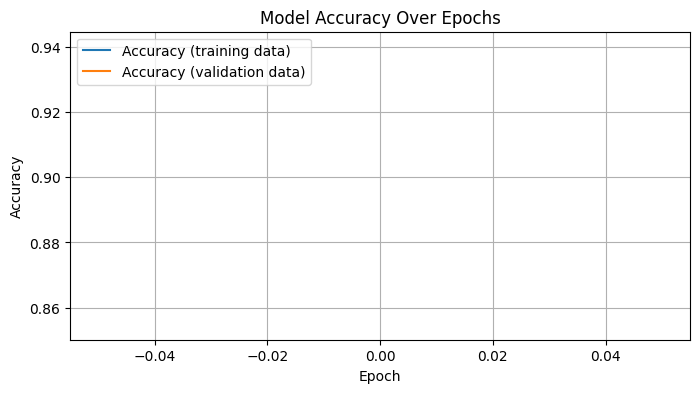

360/360 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step


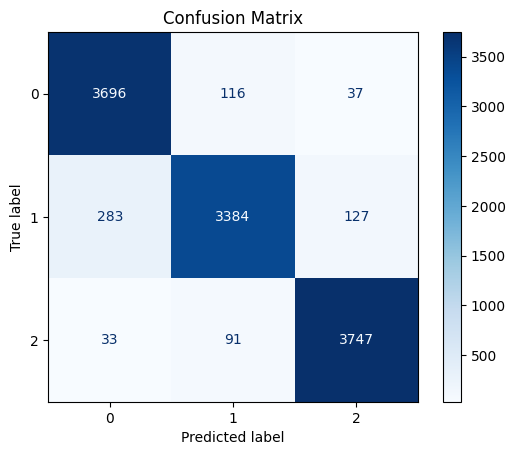

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3849
           1       0.94      0.89      0.92      3794
           2       0.96      0.97      0.96      3871

    accuracy                           0.94     11514
   macro avg       0.94      0.94      0.94     11514
weighted avg       0.94      0.94      0.94     11514



In [ ]:
# Save the model
model.save('hate_speech_model.h5')

# Plot the loss and validation accuracy
plot_learning_curve(history)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
plot_classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 302s 1s/step - accuracy: 0.9534 - loss: 0.1547 - val_accuracy: 0.9528 - val_loss: 0.1529
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 197s 818ms/step - accuracy: 0.9740 - loss: 0.0933 - val_accuracy: 0.9590 - val_loss: 0.1451
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 93s 385ms/step - accuracy: 0.9839 - loss: 0.0609 - val_accuracy: 0.9611 - val_loss: 0.1480
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 70s 292ms/step - accuracy: 0.9891 - loss: 0.0414 - val_accuracy: 0.9632 - val_loss: 0.1542
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 55s 180ms/step - accuracy: 0.9917 - loss: 0.0301 - val_accuracy: 0.9664 - val_loss: 0.1539
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - accuracy: 0.9932 - loss: 0.0238 - val_accuracy: 0.9663 - val_loss: 0.1725
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 30s 84ms/step - accuracy: 0.9944 - loss: 0.0208 - val_accuracy: 0.9675 - val_loss: 0.1655
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 33s 136ms/step - accuracy: 0.9953 - loss: 0.0

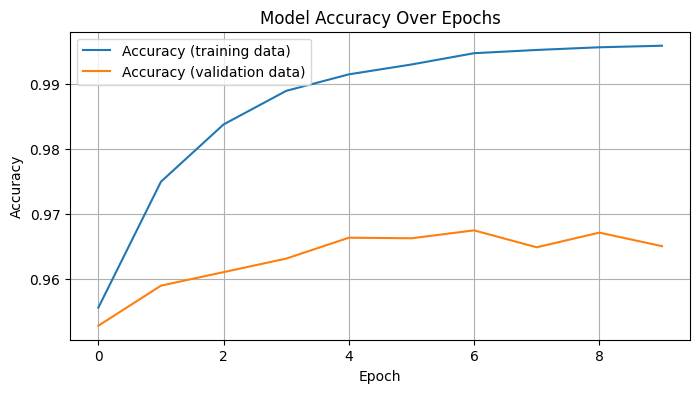

360/360 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step


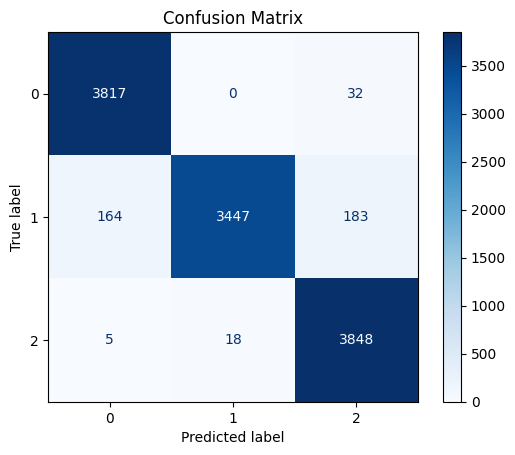

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3849
           1       0.99      0.91      0.95      3794
           2       0.95      0.99      0.97      3871

    accuracy                           0.97     11514
   macro avg       0.97      0.96      0.96     11514
weighted avg       0.97      0.97      0.96     11514



In [ ]:
#Modify hyperparameters
epochs = 10  # Increased epochs for better training
batch_size = 192  # Increased batch size
learning_rate = 0.001  # Reduced learning rate

# Recompile the model with the new optimizer and learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Retrain the model with modified hyperparameters
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Save the fine-tuned model
model.save('hate_speech_model_finetuned.h5')

# Plot the learning curve for the fine-tuned model
plot_learning_curve(history)

# Evaluate the fine-tuned model
y_pred = np.argmax(model.predict(X_test), axis=-1)
plot_classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [ ]:
#Download the finetuned model to the device

from google.colab import files

files.download('hate_speech_model_finetuned.h5')

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

# Preprocess features
scaler = StandardScaler(with_mean=False)  # Set with_mean=False
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Define base models
estimators = [
    ('lr', LogisticRegression(max_iter=100)),
    ('svc', SVC(kernel='linear', max_iter=100)),
    # Comment MultinomialNB if data is not suitable
    # ('nb', MultinomialNB())
]

# Define meta-learner (final estimator)
meta_learner = LogisticRegression(max_iter=100)

# Create stacking classifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_learner)

# Train the stacking model
print("Training stacking model...")
stacking_model.fit(X_train, y_train)
print("Training completed.")

# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate the stacking model
print("Classification Report:")
print(classification_report(y_test, y_pred))


360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


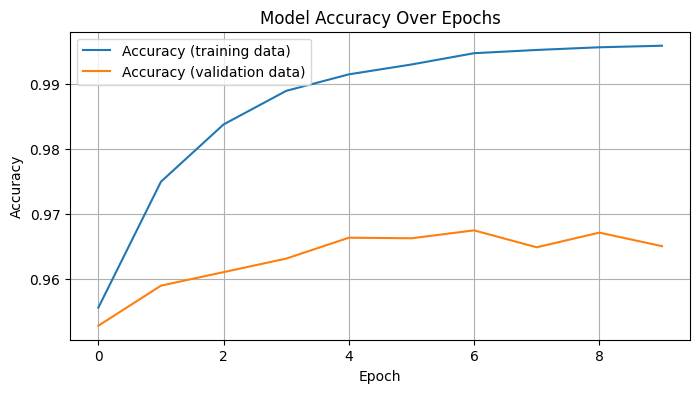

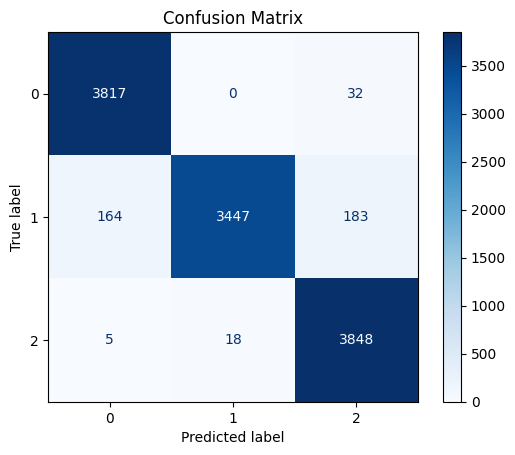

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
plot_learning_curve(history)

plot_classification_report(y_test, y_pred_classes)


In [ ]:
print("Predicted values:", y_pred)

Predicted values: [[9.9999857e-01 1.3735746e-06 6.7685813e-14]
 [9.9597824e-01 4.0217349e-03 3.3226858e-08]
 [9.9999833e-01 1.7006065e-06 1.9191685e-15]
 ...
 [9.2963648e-01 1.5211229e-02 5.5152383e-02]
 [6.4571398e-10 8.5872947e-04 9.9914122e-01]
 [1.3275412e-08 9.9999976e-01 2.6262504e-07]]


In [ ]:
# Predict values using the trained model
y_pred = model.predict(X_test)

# Display the predictions for the first 10 sentences
for i in range(10):
    print(f"Sentence {i+1}:")

    # Convert the sparse row to an array for display
    original_sentence = X_test[i].toarray() if hasattr(X_test[i], "toarray") else X_test[i]

    print(f"Original (Features): {original_sentence}")
    print(f"Predicted Class: {y_pred[i]}")
    print()


360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Sentence 1:
Original (Features): [[0.05854392 0.         0.         ... 0.         0.         0.        ]]
Predicted Class: [9.9999857e-01 1.3735746e-06 6.7685813e-14]

Sentence 2:
Original (Features): [[0.29183685 0.         0.         ... 0.         0.         0.        ]]
Predicted Class: [9.9597824e-01 4.0217349e-03 3.3226858e-08]

Sentence 3:
Original (Features): [[0.0155009 0.        0.        ... 0.        0.        0.       ]]
Predicted Class: [9.9999833e-01 1.7006065e-06 1.9191685e-15]

Sentence 4:
Original (Features): [[0.22300009 0.         0.         ... 0.         0.         0.        ]]
Predicted Class: [4.8461377e-08 1.0000000e+00 1.1270890e-08]

Sentence 5:
Original (Features): [[0.08458949 0.         0.         ... 0.         0.         0.        ]]
Predicted Class: [1.0122259e-11 1.0000000e+00 1.1970074e-08]

Sentence 6:
Original (Features): [[0. 0. 0. ... 0. 0. 0.]]
Predicted Class: [9.9999785e-01 2.1672231e-06 3.2572067e-11]


In [ ]:
def predict_class(user_input):
    """
    Predicts the class of the user input using the trained model.
    """

    # Preprocess the user input
    cleaned_input = clean_text(user_input)
    tokens = word_tokenize(cleaned_input)

    # Vectorize the input
    input_vector = vectorizer.transform([" ".join(tokens)])  # Join tokens back into a string for vectorizer

    # Predict the probabilities
    probabilities = model.predict(input_vector)[0]

    # Get the predicted class
    predicted_class = np.argmax(probabilities)

    # Print probabilities for each class
    class_labels = {0: "Neither", 1: "Offensive Language", 2: "Hate Speech"}
    for i, prob in enumerate(probabilities):
        print(f"Probability of {class_labels[i]}: {prob:.4f}")

    print(f"Predicted class: {class_labels[predicted_class]}")

# Get user input
user_input = input("Enter a sentence: ")

# Predict and print the class
predict_class(user_input)


Enter a sentence: !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still with hoes! &#128514;&#128514;&#128514;"
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Probability of Neither: 0.0000
Probability of Offensive Language: 0.9993
Probability of Hate Speech: 0.0007
Predicted class: Offensive Language
